In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #graficos 
plt.style.use('dark_background')

# Carga de datos (Dataframe)

In [2]:
import statsmodels.api as sm
import pandas as pd
data_frame = pd.read_csv("weatherAUS.csv", low_memory=False)
data_frame.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


# Análisis de datos

In [3]:
#Se obtiene cantidad de columnas y filas
print("Cantidad de Columnas : "+ str(data_frame.shape[1]))
print("Cantidad de filas : "+ str(data_frame.shape[0]))

Cantidad de Columnas : 24
Cantidad de filas : 142193


In [4]:
#Tamaño del dataset
data_frame.shape

(142193, 24)

In [5]:
#Tipo de dato que almacena cada columna
data_frame.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [6]:
#Información del data frame 
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

# Valores nulos

Eliminar las observaciones (opción simple), Imputación (mejor opción).
Acá se rellenan los valores vacíos con algún valor, puede ser el promedio del valor de la columna. 
Puede ser el valor más repetido en el caso de una variable categórica.
Una extensión de la imputación. Se agrega una columna indicando que el valor ha sido reemplazado, de esta forma, se mantiene “identificados” a los valores nulos

In [7]:
# Valores nulos
for feature in data_frame.columns:
    print('Total de valores nulos de', feature, '=', data_frame[feature].isna().sum())

Total de valores nulos de Date = 0
Total de valores nulos de Location = 0
Total de valores nulos de MinTemp = 637
Total de valores nulos de MaxTemp = 322
Total de valores nulos de Rainfall = 1406
Total de valores nulos de Evaporation = 60843
Total de valores nulos de Sunshine = 67816
Total de valores nulos de WindGustDir = 9330
Total de valores nulos de WindGustSpeed = 9270
Total de valores nulos de WindDir9am = 10013
Total de valores nulos de WindDir3pm = 3778
Total de valores nulos de WindSpeed9am = 1348
Total de valores nulos de WindSpeed3pm = 2630
Total de valores nulos de Humidity9am = 1774
Total de valores nulos de Humidity3pm = 3610
Total de valores nulos de Pressure9am = 14014
Total de valores nulos de Pressure3pm = 13981
Total de valores nulos de Cloud9am = 53657
Total de valores nulos de Cloud3pm = 57094
Total de valores nulos de Temp9am = 904
Total de valores nulos de Temp3pm = 2726
Total de valores nulos de RainToday = 1406
Total de valores nulos de RISK_MM = 0
Total de val

# Variables categóricas (Objects)

In [8]:
#Obtiene y muestra las columnas excluyendo columnas numéricas
variables_categoricas = data_frame.select_dtypes(exclude=[np.number])
variables_categoricas.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


# Transformación de datos

In [9]:
# Variable que muestra en un array las columnas que tienen datos nulos exceptuando Objects
columns_NaN = []
columnas = data_frame.columns
for col in columnas:
    if(data_frame[col].dtypes != 'object'):
        if data_frame[col].isnull().any() != False:
            columns_NaN.append(col)
columns_NaN

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [10]:
#Transforma datos nulos y rellena con el dato promedio del data frame
for column in columns_NaN:
    data_frame[column].fillna(data_frame[column].mean(), inplace=True)

In [11]:
#Creando columnas categóricas sin valores nulos (reemplazando el valor NA por la moda de cada columna)
data_frame['WindGustDirNotNull'] = data_frame['WindGustDir']
data_frame['WindDir9amNotNull'] = data_frame['WindDir9am']
data_frame['WindDir3pmNotNull'] = data_frame['WindDir3pm']
data_frame['RainTodayNotNull'] = data_frame['RainToday']

data_frame['WindGustDirNotNull'].fillna('W', inplace=True)
data_frame['WindDir9amNotNull'].fillna('N', inplace=True)
data_frame['WindDir3pmNotNull'].fillna('SE', inplace=True)
data_frame['RainTodayNotNull'].fillna('No', inplace=True)

In [12]:
#Nueva columna Region que determina la región de Australia de cada centro meteorológico
data_frame['Region'] = data_frame['Location'].map( 
    {'Adelaide' : 'SouthAustralia',
'Albany' : 'WesternAustralia',
'Albury' : 'NewSouthWales',
'AliceSprings' : 'NorthernTerritory',
'BadgerysCreek' : 'NewSouthWales',
'Ballarat' : 'Victoria',
'Bendigo' : 'Victoria',
'Brisbane' : 'Queensland',
'Cairns' : 'Queensland',
'Canberra' : 'AustralianCapitalTerritory',
'Cobar' : 'NewSouthWales',
'CoffsHarbour' : 'NewSouthWales',
'Dartmoor' : 'Victoria',
'Darwin' : 'NorthernTerritory',
'GoldCoast' : 'Queensland',
'Hobart' : 'Tasmania',
'Katherine' : 'NorthernTerritory',
'Launceston' : 'Tasmania',
'Melbourne' : 'Victoria',
'MelbourneAirport' : 'Victoria',
'Mildura' : 'Victoria',
'Moree' : 'NewSouthWales',
'MountGambier' : 'SouthAustralia',
'MountGinini' : 'AustralianCapitalTerritory',
'Newcastle' : 'NewSouthWales',
'Nhil' : 'Victoria',
'NorahHead' : 'NewSouthWales',
'NorfolkIsland' : 'Island',
'Nuriootpa' : 'SouthAustralia',
'PearceRAAF' : 'WesternAustralia',
'Penrith' : 'NewSouthWales',
'Perth' : 'WesternAustralia',
'PerthAirport' : 'WesternAustralia',
'Portland' : 'Victoria',
'Richmond' : 'Victoria',
'Sale' : 'Victoria',
'SalmonGums' : 'WesternAustralia',
'Sydney' : 'NewSouthWales',
'SydneyAirport' : 'NewSouthWales',
'Townsville' : 'Queensland',
'Tuggeranong' : 'AustralianCapitalTerritory',
'Uluru' : 'NorthernTerritory',
'WaggaWagga' : 'NewSouthWales',
'Walpole' : 'WesternAustralia',
'Watsonia' : 'Victoria',
'Williamtown' : 'NewSouthWales',
'Witchcliffe' : 'WesternAustralia',
'Wollongong' : 'NewSouthWales',
'Woomera' : 'SouthAustralia'} )

regiones = data_frame['Region'].value_counts()
regiones

NewSouthWales                 38436
Victoria                      30971
WesternAustralia              20706
Queensland                    12162
SouthAustralia                12112
AustralianCapitalTerritory     9323
NorthernTerritory              9303
Tasmania                       6216
Island                         2964
Name: Region, dtype: int64

In [13]:
data_frame

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,WindGustDirNotNull,WindDir9amNotNull,WindDir3pmNotNull,RainTodayNotNull,Region
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,...,16.9,21.8,No,0.0,No,W,W,WNW,No,NewSouthWales
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,...,17.2,24.3,No,0.0,No,WNW,NNW,WSW,No,NewSouthWales
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,...,21.0,23.2,No,0.0,No,WSW,W,WSW,No,NewSouthWales
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,...,18.1,26.5,No,1.0,No,NE,SE,E,No,NewSouthWales
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,...,17.8,29.7,No,0.2,No,W,ENE,NW,No,NewSouthWales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,5.469824,7.624853,E,31.0,ESE,...,9.4,20.9,No,0.0,No,E,ESE,E,No,NorthernTerritory
142189,2017-06-21,Uluru,2.8,23.4,0.0,5.469824,7.624853,E,31.0,SE,...,10.1,22.4,No,0.0,No,E,SE,ENE,No,NorthernTerritory
142190,2017-06-22,Uluru,3.6,25.3,0.0,5.469824,7.624853,NNW,22.0,SE,...,10.9,24.5,No,0.0,No,NNW,SE,N,No,NorthernTerritory
142191,2017-06-23,Uluru,5.4,26.9,0.0,5.469824,7.624853,N,37.0,SE,...,12.5,26.1,No,0.0,No,N,SE,WNW,No,NorthernTerritory


# Valores nulos despues de la transformacion de datos

In [14]:
for feature in data_frame.columns:
    print('Total de valores nulos de', feature, '=', data_frame[feature].isna().sum())

Total de valores nulos de Date = 0
Total de valores nulos de Location = 0
Total de valores nulos de MinTemp = 0
Total de valores nulos de MaxTemp = 0
Total de valores nulos de Rainfall = 0
Total de valores nulos de Evaporation = 0
Total de valores nulos de Sunshine = 0
Total de valores nulos de WindGustDir = 9330
Total de valores nulos de WindGustSpeed = 0
Total de valores nulos de WindDir9am = 10013
Total de valores nulos de WindDir3pm = 3778
Total de valores nulos de WindSpeed9am = 0
Total de valores nulos de WindSpeed3pm = 0
Total de valores nulos de Humidity9am = 0
Total de valores nulos de Humidity3pm = 0
Total de valores nulos de Pressure9am = 0
Total de valores nulos de Pressure3pm = 0
Total de valores nulos de Cloud9am = 0
Total de valores nulos de Cloud3pm = 0
Total de valores nulos de Temp9am = 0
Total de valores nulos de Temp3pm = 0
Total de valores nulos de RainToday = 1406
Total de valores nulos de RISK_MM = 0
Total de valores nulos de RainTomorrow = 0
Total de valores nul

# Agrupacion de datos

In [15]:
#Mostrando promedio de datos en columnas numéricas, agrupando por localidad
groupad=data_frame.groupby("Region").mean()
groupad.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
Region,,,,,,,,,,,,,,,,,
AustralianCapitalTerritory,6.027206,18.063990,2.335396,5.261555,7.588912,40.288281,11.307823,16.579070,73.928151,53.214926,1018.388107,1015.726117,4.547318,4.569578,11.253321,16.887910,2.360957
Island,16.838389,21.792746,3.132254,4.789380,7.101920,42.602342,20.151827,21.890444,70.806754,67.829610,1017.631420,1015.887151,4.984369,4.835420,19.740701,20.437002,3.127665
NewSouthWales,13.055968,23.797511,2.739286,5.614657,7.647289,39.131513,13.094684,17.908994,69.159833,51.839111,1018.196021,1015.673569,4.320115,4.425930,17.606086,22.295715,2.758630
NorthernTerritory,17.995435,31.488285,2.675325,7.130497,8.454748,40.383717,14.855967,18.480241,54.074802,37.484958,1014.470485,1010.673991,3.673111,3.968603,24.132870,29.254281,2.700602
Queensland,18.808367,27.762419,4.005990,6.033714,7.911545,36.770911,14.239687,20.602700,66.001819,58.878323,1016.397739,1013.358577,4.296936,4.213531,23.880659,26.025817,4.018977


In [16]:
pivot1 = pd.pivot_table(data_frame, index=['Region'], values=['MaxTemp', 'MinTemp','Evaporation'],aggfunc=np.mean)
pivot1.sort_values("Evaporation", ascending=False).head()

,Evaporation,MaxTemp,MinTemp
Region,,,
NorthernTerritory,7.130497,31.488285,17.995435
Queensland,6.033714,27.762419,18.808367
SouthAustralia,5.968759,22.749077,11.040658
NewSouthWales,5.614657,23.797511,13.055968
WesternAustralia,5.352117,23.356942,11.841946


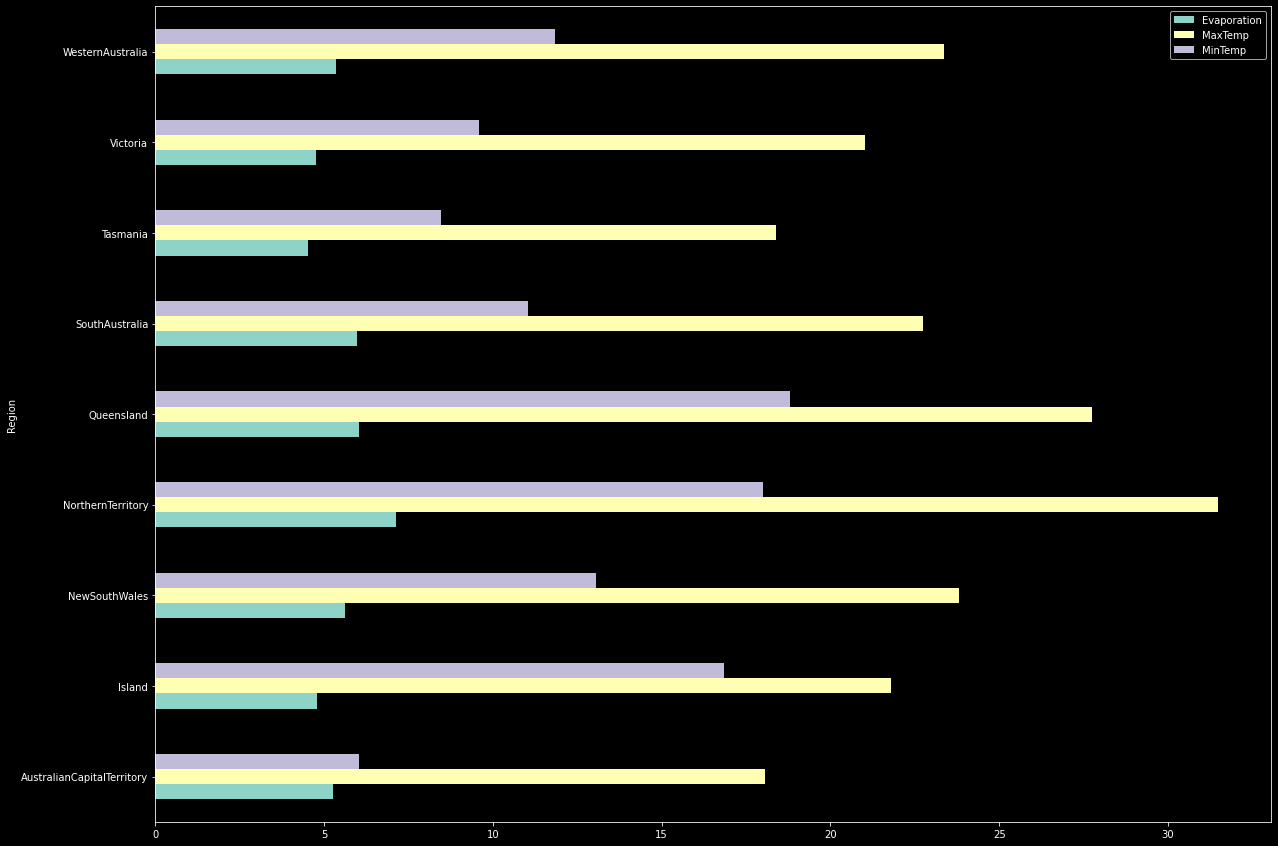

In [17]:
pivot1.plot(figsize=(20,15), kind = 'barh');

Hallazgo:
A raíz del gráfico podemos encontrar que el Northern Territory tiene un clima más árido que New South Wales y Western Australia, ya que el territorio en el norte posee en promedio poco más de 30° grados de temperatura máxima y cerca de 20° de temperatura mínima.

Comparado con el clima templado que se puede encontrar en las regiones ubicadas al sureste y suroeste, que tiene un promedio de temperatura máxima menor a 25° de máxima y mínima menor a 15° grados.

El territorio del norte tiene más cercanía con el centro de Australia, caracterizado por ser un clima desértico y por lo tanto, más caluroso.

# Comparando la temperatura mínima y máxima de Darwin en 2009 y 2016 

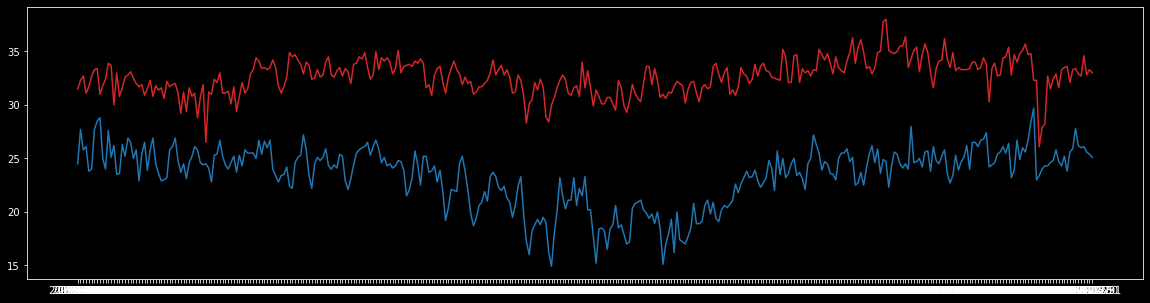

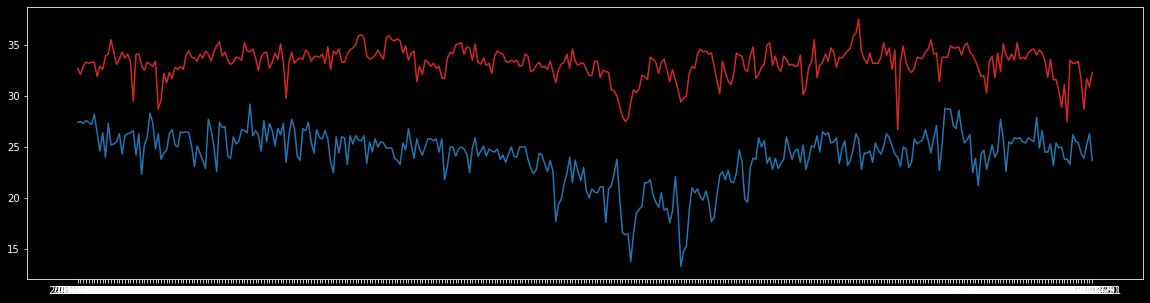

In [21]:
#Darwin se encuentra al norte de Australia, en el Northern Territory
nombre = ['Darwin2009','Darwin2016']
anos = ['2009','2016']


primerFiltro = data_frame[
    (data_frame['Location'].str.contains('Darwin') == True)
]
lineas = []
for i, j in zip(nombre, anos):
    temp = primerFiltro[
        (primerFiltro['Date'].str.contains(j) == True)
    ]
    lineas.append(temp)

for i in lineas:
    
    fig, ax = plt.subplots(figsize=(20,5)) 
    ax.plot(i['Date'], i['MinTemp'], color = 'tab:blue')
    ax.plot(i['Date'], i['MaxTemp'], color = 'tab:red')
# ax.plot(i['Date'], i['Humidity9am'], color = 'tab:Green') #Humedad
plt.show()

Hallazgo:
Al comparar las temperaturas mínimas y máximas de la ciudad de Darwin, ubicada al norte de Australia, podemos ver que en el año 2009, la temperatura máxima oscila entre los 28° y 40° y la temperatura mínima se encuentra entre 15° y 27°.
A su vez, al comparar las temperaturas de la misma ciudad en 2016, podemos ver que los rangos de temperatura no varían en grados, pero, luego de 9 años podemos ver que a la altura de los meses de invierno (junio - agosto) están siendo levemente más fríos cada año, disminuyendo sus temperaturas en aproximadamente 5° tanto en mínimas y máximas registradas.
Además, gerneralmente, tiene veranos más húmedos debido a ciclones y lluvias e inviernos secos y calurosos.
Todo lo anterior se puede asociar al cambio climático, lo que durante el tiempo resulta en veranos más cálidos e inviernos más fríos, algo que levemente se va notando a través de los años.

# Comparando Temperatura Min y Max de Adelaide en 2009 y 2016

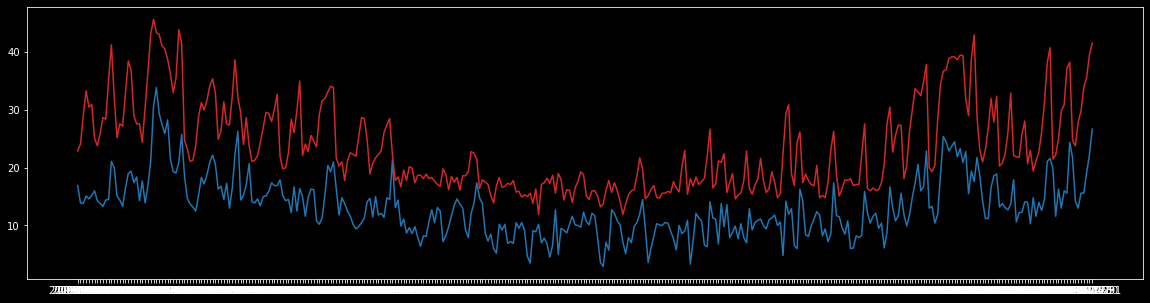

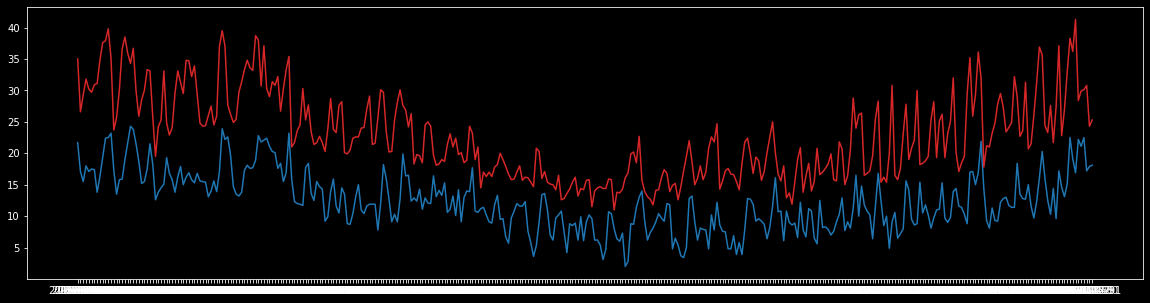

In [22]:
nombre = ['Adelaide2009','Adelaide2016']
anos = ['2009','2016']
SegundoFiltro = data_frame[
    (data_frame['Location'].str.contains('Adelaide') == True)
]
lineasS = []
for i, j in zip(nombre, anos):
    temp = SegundoFiltro[
        (SegundoFiltro['Date'].str.contains(j) == True)
    ]
    lineasS.append(temp)
for i in lineasS:
    
    fig, ax = plt.subplots(figsize=(20,5))
    ax.plot(i['Date'], i['MinTemp'], color = 'tab:Blue')
    ax.plot(i['Date'], i['MaxTemp'], color = 'tab:Red')
#     ax.plot(i['Date'], i['Humidity9am'], color = 'tab:Green') #Humedad
plt.show()


Hallazgo: Adelaide en cambio, es una ciudad ubicada en la región del sur de Australia. Aquí podemos observar el mísmo fenómeno, pero de forma más abrupta comparando los años 2009 y 2016. Sus temperaturas también coinciden con las consecuencias del avance del cambio climático, en donde las temperaturas en invierno se encuentran bajo la barrera de los 5° y sus máximas en cambio oscilan entre 15° y 40°, dependiendo la temporada.
Adelaide al ser una ciudad costera ubicada al sur, pero rodeada de un clima desértico, genera un clima suave con veranos calurosos e inviernos húmedos

Text(0.5, 1.0, 'Relacion entre la Tem. Max,  Nubocidad y Evaporación a las 9 AM')

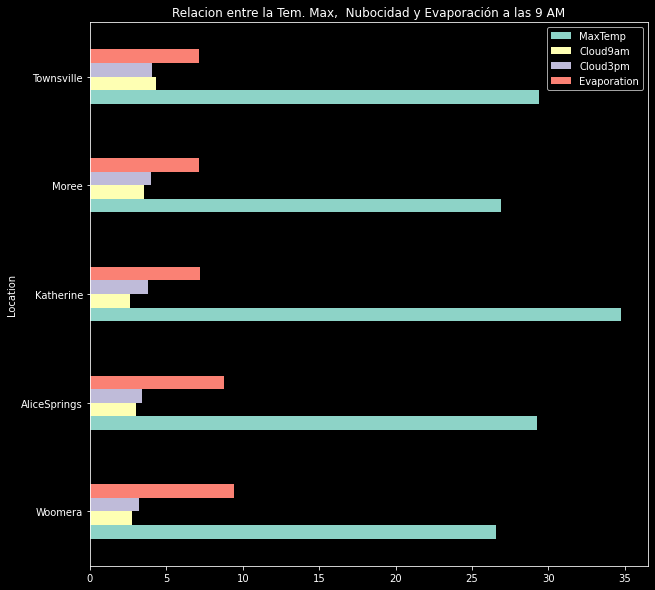

In [27]:
#Demostracion de la relacion entre la Tem. Max,  Nubocidad y Humedad a las 9 AM
#En donde podemos apreciar que a mayor temperatura, mayor es la evaporación del agua en el ambiente y menor es la nubocidad relativa

groupad1=data_frame.groupby("Location").agg({
    "MaxTemp":'mean',
    "Cloud9am":'mean',
    "Cloud3pm":'mean',
    "Evaporation":'mean'
   })
groupad1.sort_values("Evaporation", ascending=False).head().plot(figsize=(10,10), kind = 'barh');
plt.title("Relacion entre la Tem. Max,  Nubocidad y Evaporación a las 9 AM")

Hallazgo: Estas son las 5 ciudades con un promedio de evaropación más alto, en donde podemos descubrir que a mayor temepratura, generalmente hay mayor evaporación del agua en el ambiente, resultando en una menor nubocidad relativa. Esto se puede evidenciar con la totalidad de las localidades, en donde dependiendo de su temperatura máxima se puede observar el fenómeno anteriormente nombrado.

Woomera - South Australia
Alice Springs - Northern Territory
Katherine - Northern Territory
Moree - New South Wales
Townsville - Queensland

Podemos concluir que sin importar la región, este fenómeno afecta de igual forma en los índices de nubocidad

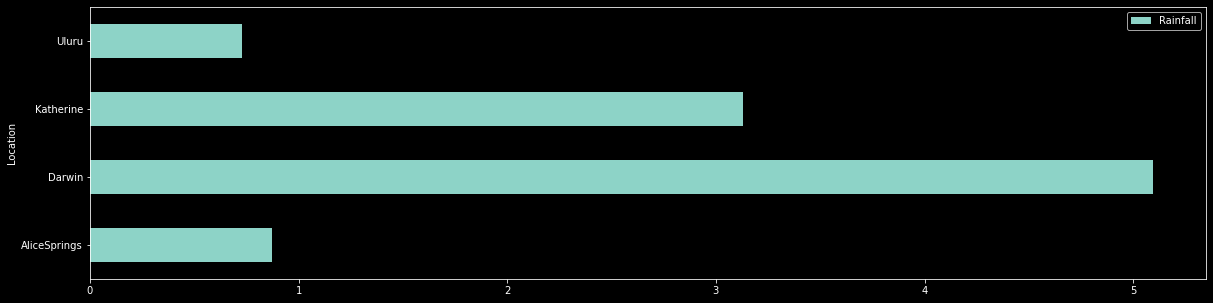

In [21]:
groupad1 = data_frame[(data_frame['Region'].str.contains('NorthernTerritory') == True)]
groupad1=data_frame[(data_frame['Region'].str.contains('NorthernTerritory') == True)].groupby("Location").agg({
    "Rainfall":'mean',
   })
groupad1
groupad1.plot(figsize=(20,5), kind = 'barh');

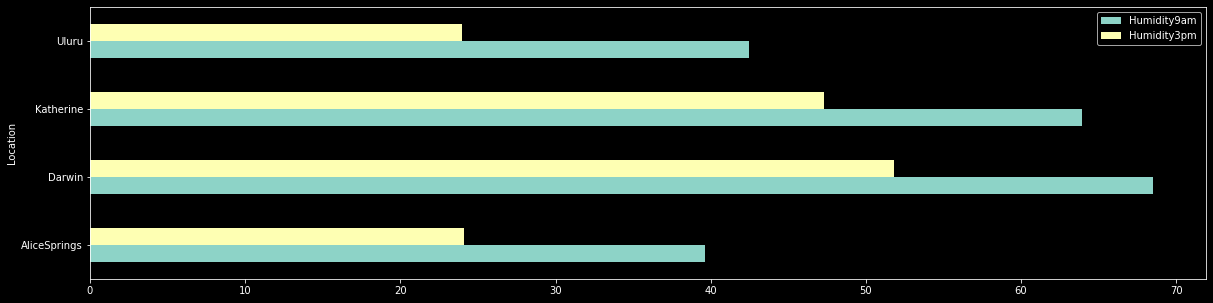

In [22]:
groupad1=data_frame[(data_frame['Region'].str.contains('NorthernTerritory') == True)].groupby("Location").agg({
    "Humidity9am":'mean',
    "Humidity3pm":'mean'
   })
groupad1
groupad1.plot(figsize=(20,5), kind = 'barh');

Hallazgo: Con la información que entrega estos dos simples gráficos, podemos notar que a pesar de que estas 4 localidades se encuentran en el territorio del norte de Australia, podemos inferir su ubicación. Las ciudades de Alice Springs y Ulruru se encuentran más cercanos al centro del país, donde predomina un clima desértico y seco en cuanto a humedad. 
Katherine y Darwin por su parte, se puede deducir que se encuentran más al norte de la región, ya que tienen un clima tropical, con más mm de lluvia y mayor humedad general.

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

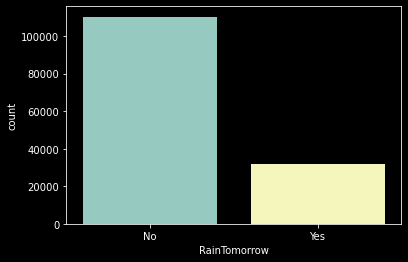

In [28]:
sns.countplot(x=data_frame['RainTomorrow'])

Ahora haremos una agrupacion según los meses de todos los datos para visualizar que tanto llueve a lo largo del tiempo.

In [29]:
data_frame['Date'] = pd.to_datetime(data_frame['Date'])
data_frame['Month'] = data_frame['Date'].dt.month

<AxesSubplot:xlabel='Month', ylabel='Percentage'>

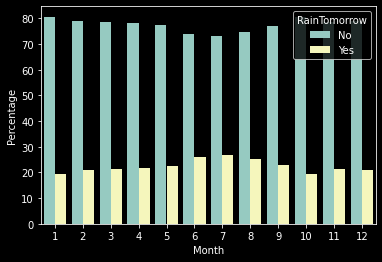

In [30]:
cuenta_meses = (data_frame.groupby(['Month'])['RainTomorrow']
                .value_counts(normalize=True)
                .rename('Percentage')
                .mul(100)
                .reset_index()
                .sort_values('Month'))

sns.barplot(x='Month', y='Percentage', hue='RainTomorrow', data=cuenta_meses)

El eje Y muestra el porcentaje y el eje x muestra del 1 al 12 los meses.

Hallazgo: Considerando que el invierno en Australia comienza en Junio (Mes 6) y termina en Agosto (Mes 8) podemos ver que a lo largo de los años llovió bastante poco durante esos meses teniendo probabilidad de 75% que no llueva y un 25% a que si llueva. Si nos ponemos a comparar el porcentaje de los meses que llovió en Enero podemos ver que 80% de esos días no llovió y un 20% si, Dándonos como conclusión que en Australia no suele llover mucho.

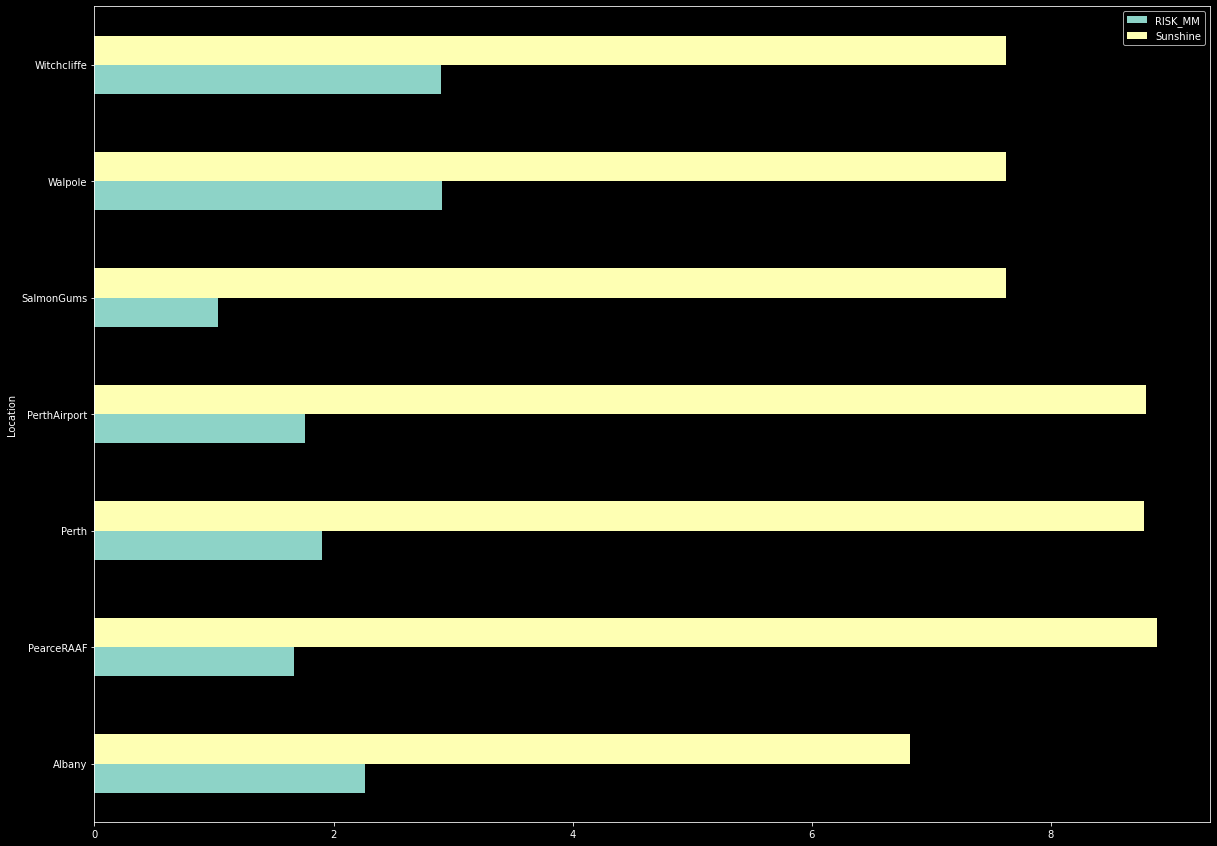

In [50]:
df_pie=data_frame[(data_frame['Region'].str.contains('WesternAustralia') == True)].groupby("Location").agg({
    "RISK_MM":'mean',
    "Sunshine" :'mean',
    })

df_pie.plot(figsize=(20,15), kind = 'barh');

Hallazgo: En la región del Western Austrlia se encuentran 7 localidades, en las cuales se puede descubrir que el riesgo de lluvia es menor en las ciudades más cercanas a la costa oeste del territorio y en donde existe mayor cantidad de horas de sol diario. Por otra parte, en las localidades más cercanas a la costa sur-oeste del territorio, existe una menor cantidad de horas diarias de sol, lo que se puede traducir en mayor riesgo de lluvia. Exceptuando Salmon Gums, que se encuentra más cercano al centro sur de Western Australia.